# Empirical Project II - Zimbabwe
## Factors that influence smoking prevalence 
The title of the notebook should be coherent with file name. Homework, project,etc   

In [3]:
%%capture
# Capture suppresses output to screen
import stata_setup
stata_setup.config("/Applications/Stata 17", "be")

In [5]:
%%stata
/* Define paths for data and output */
global data "Data"
global output "Output"
global country "zimbabwe"


. /* Define paths for data and output */
. global data "Data"

. global output "Output"

. global country "zimbabwe"

. 


In [64]:
%%capture
%%stata
log using "$output/${country}Model.log", replace

In [6]:
%%stata
use "$data/${country}SmokingSurvery.dta", clear
describe


. use "$data/${country}SmokingSurvery.dta", clear

. describe

Contains data from Data/zimbabweSmokingSurvery.dta
 Observations:         6,427                  
    Variables:            83                  11 Aug 2021 12:55
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
FinalWgt        double  %10.0g                FinalWgt
Stratum         long    %10.0g                Stratum
PSU             byte    %10.0g                PSU
CR1             byte    %10.0g                CR1
CR2             byte    %10.0g                CR2
ZBR3            byte    %10.0g                ZBR3
ZBR4            byte    %10.0g                ZBR4
CR5             byte    %10.0g                CR5
CR6             byte    %10.0g                CR6
CR7             byte    %10.0g                CR7
C

In [8]:
%%stata
/* Declare the data as survey data */
svyset PSU [pweight = FinalWgt], strata(Stratum)


. /* Declare the data as survey data */
. svyset PSU [pweight = FinalWgt], strata(Stratum)

Sampling weights: FinalWgt
             VCE: linearized
     Single unit: missing
        Strata 1: Stratum
 Sampling unit 1: PSU
           FPC 1: <zero>

. 


## Question: 
Does exposure to smoking impact the probability of youth smoking?

Factors that influence prevalence of youth smoking in Cameroon:
+ Age
+ Sex
+ Availability of spending money
+ Exposure to smokers
    + Home
    + Indoor events outside home
    + Outdoor events

In [67]:
%%stata
summarize smoker i.ageCategory i.female i.hasMoney ///
    i.smokingHome i.smokingIndoors i.smokingOutdoors
tab smoker
tab female


. summarize smoker i.ageCategory i.female i.hasMoney ///
>     i.smokingHome i.smokingIndoors i.smokingOutdoors

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
      smoker |      5,562    .0868393    .2816247          0          1
             |
 ageCategory |
<= 11 yrs..  |      6,416    .0110661    .1046199          0          1
 12 yrs old  |      6,416    .0905549    .2869974          0          1
 13 yrs old  |      6,416    .2774314    .4477661          0          1
 14 yrs old  |      6,416    .3188903    .4660827          0          1
-------------+---------------------------------------------------------
 15 yrs old  |      6,416    .2007481    .4005912          0          1
 16 yrs old  |      6,416    .0729426    .2600626          0          1
>= 17 yrs..  |      6,416    .0283666    .1660308          0          1
             |
      female |
       male  |      6,346    .4467

In [68]:
%%stata
svy: logit smoker i.ageCategory i.female i.hasMoney ///
    i.smokingHome i.smokingIndoors i.smokingOutdoors
outreg using ${output}/${country}Reg.doc, se replace    


. svy: logit smoker i.ageCategory i.female i.hasMoney ///
>     i.smokingHome i.smokingIndoors i.smokingOutdoors
(running logit on estimation sample)

Survey: Logistic regression

Number of strata =  51                            Number of obs   =      5,240
Number of PSUs   = 103                            Population size = 752,290.95
                                                  Design df       =         52
                                                  F(11, 42)       =      31.12
                                                  Prob > F        =     0.0000

------------------------------------------------------------------------------
             |             Linearized
      smoker | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 ageCategory |
 12 yrs old  |  -1.924295   1.112753    -1.73   0.090    -4.157198    .3086077
 13 yrs old  |  -1.832226   1.133099    -1.62   0.112 

In [69]:
%%stata
svy: probit smoker i.ageCategory i.female i.hasMoney ///
    i.smokingHome i.smokingIndoors i.smokingOutdoors
outreg using ${output}/${country}Reg.doc, se merge replace    


. svy: probit smoker i.ageCategory i.female i.hasMoney ///
>     i.smokingHome i.smokingIndoors i.smokingOutdoors
(running probit on estimation sample)

Survey: Probit regression

Number of strata =  51                            Number of obs   =      5,240
Number of PSUs   = 103                            Population size = 752,290.95
                                                  Design df       =         52
                                                  F(11, 42)       =      36.22
                                                  Prob > F        =     0.0000

------------------------------------------------------------------------------
             |             Linearized
      smoker | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 ageCategory |
 12 yrs old  |  -.8992641    .609341    -1.48   0.146    -2.121996     .323468
 13 yrs old  |   -.955716   .6161418    -1.55   0.127 

In [11]:
%%stata
svy: logit smoker i.ageCategory i.female i.hasMoney ///
    i.smokingHome i.smokingIndoors i.smokingOutdoors
margins i.ageCategory i.female i.hasMoney ///
    i.smokingHome i.smokingIndoors i.smokingOutdoors, atmeans


. svy: logit smoker i.ageCategory i.female i.hasMoney ///
>     i.smokingHome i.smokingIndoors i.smokingOutdoors
(running logit on estimation sample)

Survey: Logistic regression

Number of strata =  51                            Number of obs   =      5,240
Number of PSUs   = 103                            Population size = 752,290.95
                                                  Design df       =         52
                                                  F(11, 42)       =      31.12
                                                  Prob > F        =     0.0000

------------------------------------------------------------------------------
             |             Linearized
      smoker | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 ageCategory |
 12 yrs old  |  -1.924295   1.112753    -1.73   0.090    -4.157198    .3086077
 13 yrs old  |  -1.832226   1.133099    -1.62   0.112 


. margins i.ageCategory, atmeans

Adjusted predictions

Number of strata =  51                            Number of obs   =      5,240
Number of PSUs   = 103                            Population size = 752,290.95
Model VCE: Linearized                             Design df       =         52

Expression: Pr(smoker), predict()
At: 0.ageCategory     = .0087627 (mean)
    1.ageCategory     = .0562547 (mean)
    2.ageCategory     = .3001631 (mean)
    3.ageCategory     = .3024281 (mean)
    4.ageCategory     = .2769284 (mean)
    5.ageCategory     = .0387873 (mean)
    6.ageCategory     = .0166758 (mean)
    0.female          = .4770297 (mean)
    1.female          = .5229703 (mean)
    0.hasMoney        = .3710723 (mean)
    1.hasMoney        = .6289277 (mean)
    0.smokingHome     = .7608672 (mean)
    1.smokingHome     = .2391328 (mean)
    0.smokingIndoors  =  .553174 (mean)
    1.smokingIndoors  =  .446826 (mean)
    0.smokingOutdoors = .5260839 (mean)
    1.smokingOutdoors = .473916

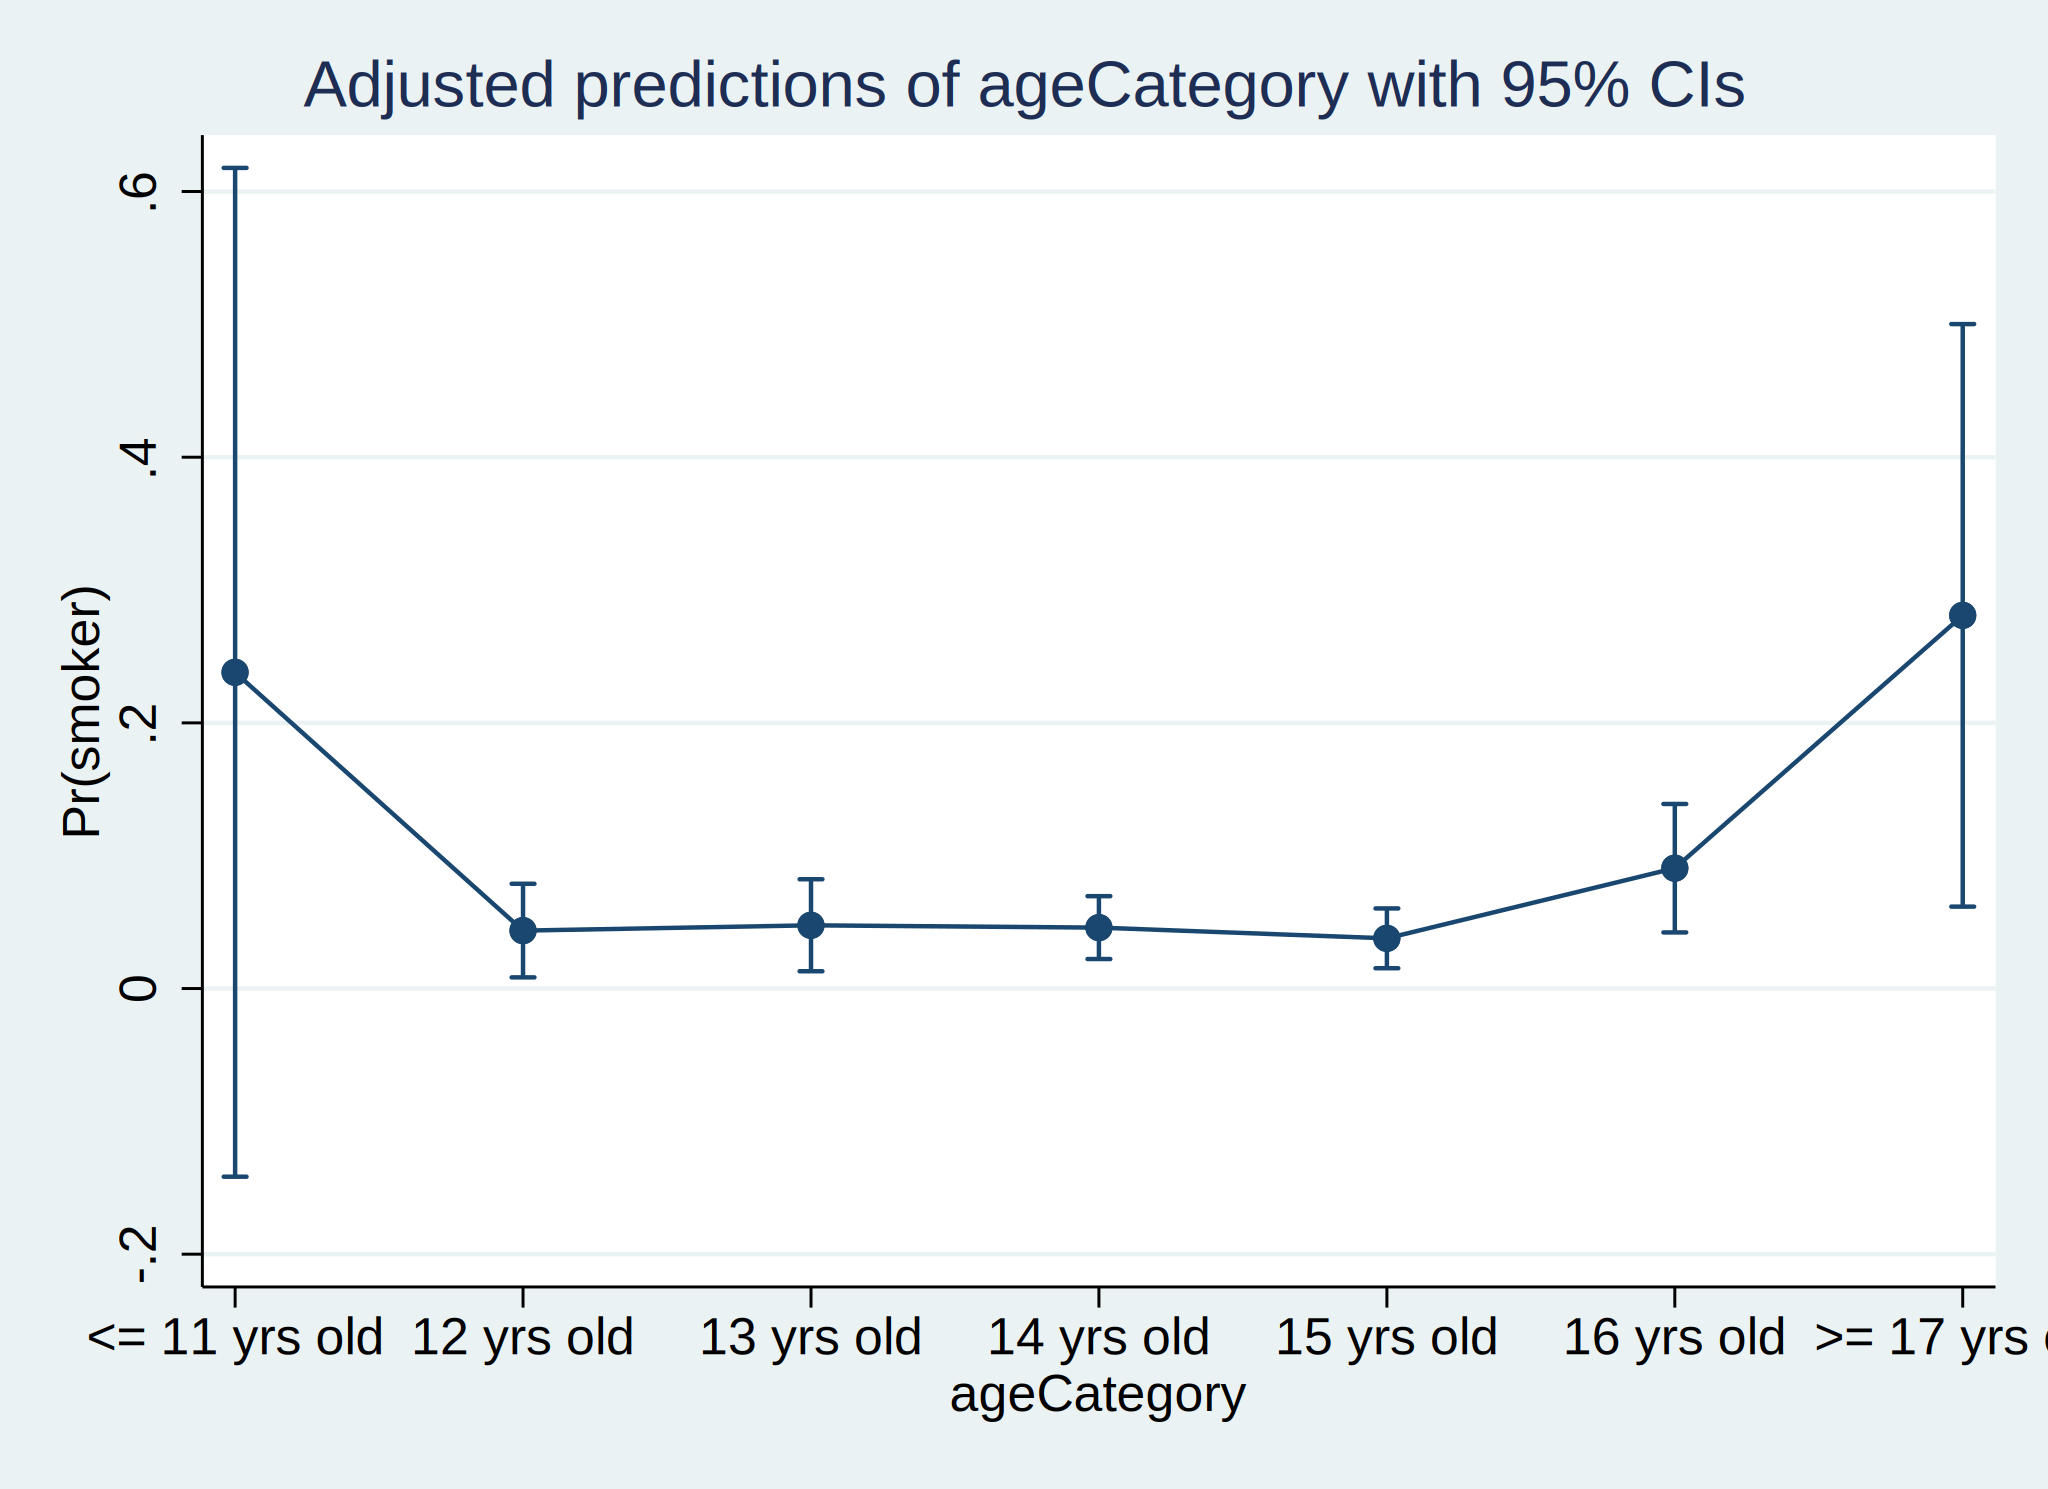

In [71]:
%%stata
margins i.ageCategory, atmeans
marginsplot

In [72]:
%%capture
%%stata
log close
clear